In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

## Logistic Regression

In [2]:
games = pd.read_csv('datasets/games-prediction-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0


In [3]:
table = pd.DataFrame(index = ['recall', 'precision', 'accuracy', 'fscore'], 
                     columns = ['original', 'oversampled', 'balanced_sampled'])


In [4]:
# Extract Response and Predictors
X = games.drop(['recommend'], axis = 1) 
y = games['recommend']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.6592082616179001

TPR Train :	 0.9469870327993898
TNR Train :	 0.1370242214532872

FPR Train :	 0.8629757785467128
FNR Train :	 0.053012967200610224

Precision:	 0.5875370919881305
Recall:   	 0.1370242214532872
F1-score :	 0.2222222222222222


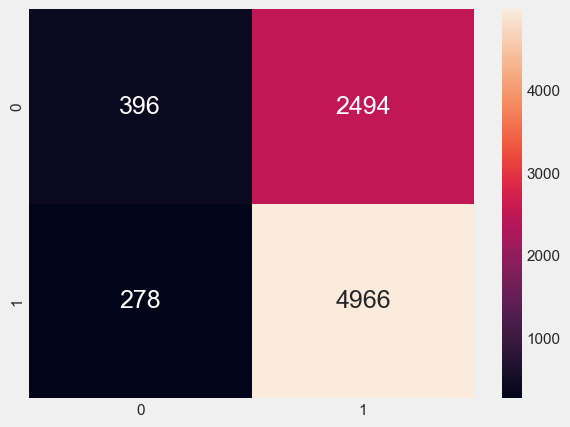

In [5]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}) 
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])


Test Data
Accuracy  :	 0.6660929432013769

TPR Test :	 0.9457935819601041
TNR Test :	 0.11949152542372882

FPR Test :	 0.8805084745762712
FNR Test :	 0.054206418039895926

Precision:	 0.5300751879699248
Recall:   	 0.11949152542372882
F1-score :	 0.19502074688796683


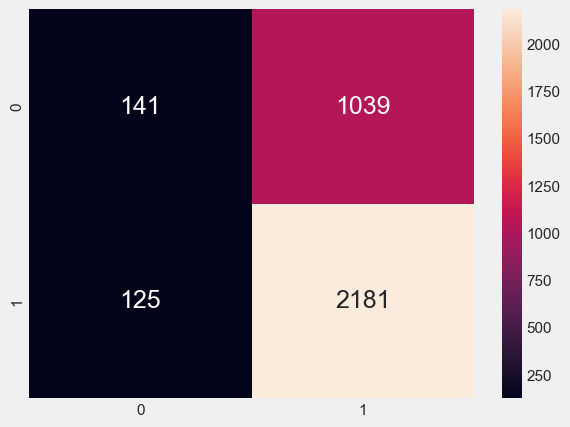

In [6]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['original'] = [recall[0], precision[0], LogisticR.score(X_test, y_test), fscore[0]]

# Logistic Regression - Oversampling

In [7]:
games = pd.read_csv('datasets/games-prediction-over-resampling.csv', index_col= 0)
games.head()


,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4,recommend
0,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,True
1,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
2,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0,True
3,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
4,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0,True


In [8]:
games.isnull().sum()

original_price                 0
discount_price                 0
discount_percentage            0
mature_content                 0
genre_Action                   0
genre_Adventure                0
genre_Casual                   0
genre_Massively Multiplayer    0
genre_RPG                      0
genre_Racing                   0
genre_Simulation               0
genre_Sports                   0
genre_Strategy                 0
K_cluster_0                    0
K_cluster_1                    0
K_cluster_2                    0
K_cluster_3                    0
K_cluster_4                    0
recommend                      0
dtype: int64

In [9]:
# Extract Response and Predictors
X = games.drop('recommend', axis = 1) 
y = games['recommend']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.5984442342058236

TPR Train :	 0.8432566102339738
TNR Train :	 0.29605263157894735

FPR Train :	 0.7039473684210527
FNR Train :	 0.15674338976602625

Precision:	 0.6046065259117083
Recall:   	 0.29605263157894735
F1-score :	 0.3974763406940063


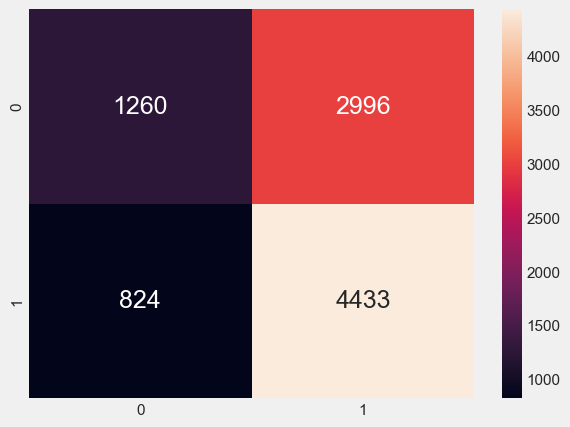

In [10]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}) 
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])


Test Data
Accuracy  :	 0.5943095413294088
TPR Test :	 0.8312254688181422
TNR Test :	 0.2897982062780269

FPR Test :	 0.7102017937219731
FNR Test :	 0.16877453118185784

Precision:	 0.5719026548672567
Recall:   	 0.2897982062780269
F1-score :	 0.38467261904761907


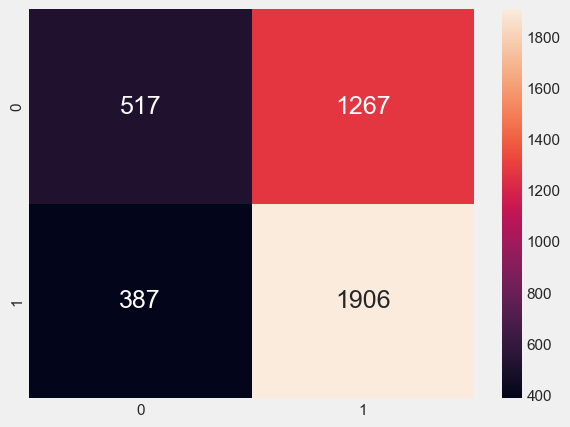

In [11]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])



table['oversampled'] = [recall[0], precision[0], LogisticR.score(X_test, y_test), fscore[0]]

# Logistic Regression - Balanced Resampled

In [12]:
games = pd.read_csv('datasets/games-prediction-balanced-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0
8,True,29.99,29.99,0.000000,False,0,0,0,0,0,0,0,0,1,0,0,1,0,0
10,True,19.99,19.99,0.000000,False,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [13]:
# Extract Response and Predictors
X = games.drop(['recommend'], axis = 1) 
y = games['recommend']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))
print()

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)


# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))


precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])
# Plot the two-way Confusion Matrix

Train Data
Accuracy  :	 0.5833491012298959

TPR Train :	 0.6082957957957958
TNR Train :	 0.5579931323922167

FPR Train :	 0.4420068676077833
FNR Train :	 0.3917042042042042

Precision:	 0.5835993615323224
Recall:   	 0.5579931323922167
F1-score :	 0.5705090696313633


Test Data
Accuracy  :	 0.5883002207505519
TPR Test :	 0.6165616561656165
TNR Test :	 0.5610918544194108

FPR Test :	 0.43890814558058927
FNR Test :	 0.38343834383438347

Precision:	 0.6031672100605496
Recall:   	 0.5610918544194108
F1-score :	 0.5813692480359147


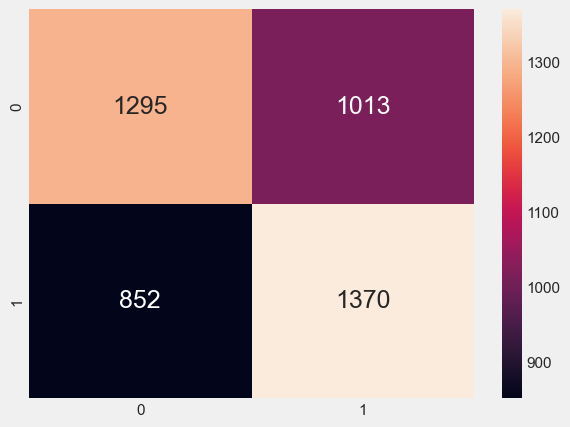

In [15]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)


# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['balanced_sampled'] = [recall[0], precision[0], LogisticR.score(X_test, y_test), fscore[0]]



### Overview Visualization of Results 

In [16]:
table

,original,oversampled,balanced_sampled
recall,0.119492,0.289798,0.561092
precision,0.530075,0.571903,0.603167
accuracy,0.666093,0.594310,0.588300
fscore,0.195021,0.384673,0.581369


In [17]:
def draw_figure(table, row, title):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.ylim([0,0.8])
    splot = sb.barplot(x = ['original','oversampled','balanced_sampled'],y = table.iloc[row,:])
    for p in splot.patches:
        if p.get_height() == 0:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        else:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, -12), 
                           textcoords = 'offset points')
    

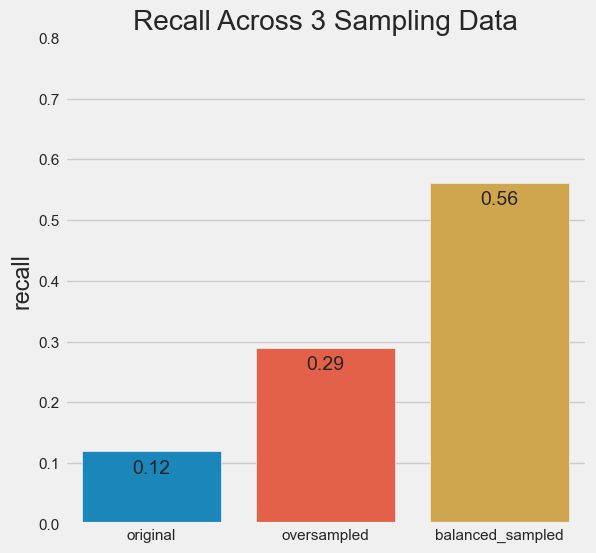

In [18]:
draw_figure(table,0,"Recall Across 3 Sampling Data")

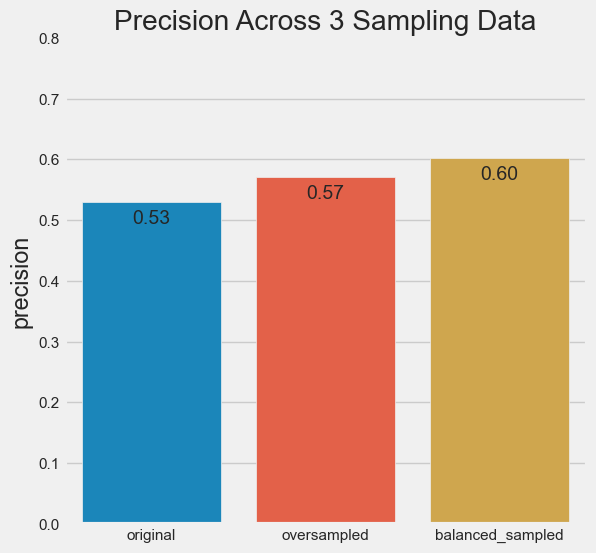

In [19]:
draw_figure(table,1,"Precision Across 3 Sampling Data")

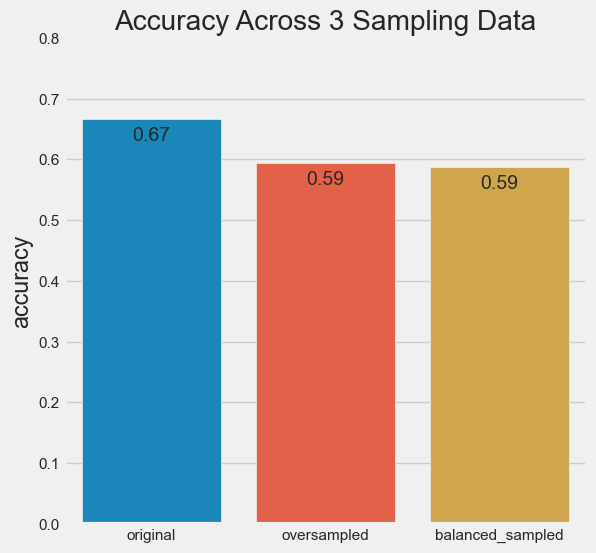

In [20]:
draw_figure(table,2,"Accuracy Across 3 Sampling Data")

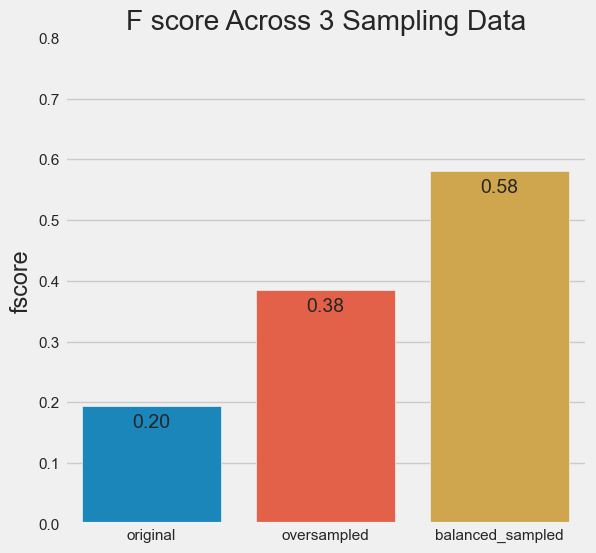

In [21]:
draw_figure(table,3,"F score Across 3 Sampling Data")